#  ブラックボックス最適化(BBO)ベンチマーク

## 手法
### 遺伝的アルゴリズム

### 進化戦略
https://www.jstage.jst.go.jp/article/sicejl/54/8/54_567/_pdf
http://www.matsumoto.nuem.nagoya-u.ac.jp/jascome/denshi-journal/20/No.08-201219.pdf
https://arxiv.org/abs/1604.00772
https://horomary.hatenablog.com/entry/2021/01/23/013508
https://math-note.com/multivariate-normal-distribution/

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import datetime

from bbo_algo import *
from benchmark_function import *

In [18]:
class BenchMarker():
    def __init__(self,max_iter=100):
        self._bbo_table = {
            'CMA-ES':CMA_ES(),
            'TPE':TPE(),
            'RandomSearch':RandomSearch(),
            'GridSearch':GridSearch(),
            'GA(optuna)':NSGA(),
            'Nelder-Mead':NelderMead(),
            'GA(hand made)':GeneticAlgorithm(),            
        }
        
        self._max_iter = max_iter
        self._result_s = dict()

    def benchmark(self,model,is_plot=False):
        

        result_table = {
            'algo':[],
            'calc time':[],
            'fval':[]      
        }

        result = dict()
        for key,value in self._bbo_table.items():
            print("{} start!".format(key))

            start_time = time.perf_counter()
            fval,params = value.optimization(model,self._max_iter)
            end_time = time.perf_counter()
            elapsed_time = end_time - start_time

            result.update({key:(fval,params)})
            fval_s,params_s = value.get_history()
            self._result_s.update({key:(fval_s,params_s)})

            result_table['algo'].append(key)
            result_table['calc time'].append(elapsed_time)
            result_table['fval'].append(fval)
            
            del value


        for key,value in result.items():
            print("{} achieved {}.".format(key,value[0]))

        if is_plot:
            self.plot_history()

        return pd.DataFrame(result_table) 

    def plot_history(self,
                    fig_name=None,
                    is_log = False,
                    is_save=False
                    ):
        plt.figure()

        trial = [i for i in range(self._max_iter)]
        for key,value in self._result_s.items():
            plt.plot(trial,value[0],label=key)
        plt.legend()
        plt.xlabel('Trial')
        plt.ylabel('Evaluation value')

        if is_log:
            plt.yscale('log')
        if is_save:
            os.makedirs('fig',exist_ok=True)
            if fig_name:
                d = fig_name
            else:
                now = datetime.datetime.now()
                d = now.strftime('%Y%m%d%H%M%S')
            plt.savefig('fig/'+d+'.png' ,format="png" ,dpi=300)
        plt.show()      



[I 2022-05-11 23:14:59,783] A new study created in memory with name: no-name-58e2a052-8b5d-4e41-b348-1d2455264277
[I 2022-05-11 23:14:59,785] A new study created in memory with name: no-name-759c3c0f-f5d2-4706-920f-526b4f899e7d
[I 2022-05-11 23:14:59,786] A new study created in memory with name: no-name-4b90e545-caf4-4146-a649-4afc1a6617ac
[I 2022-05-11 23:14:59,787] A new study created in memory with name: no-name-435aabbf-7738-49fa-856a-24c4919e9898
[I 2022-05-11 23:14:59,789] Trial 0 finished with value: 156.77821081406526 and parameters: {'x0': -7.05966149445576, 'x1': 4.205143186365731, 'x2': 3.3671809594331865, 'x3': -0.6989963608139185, 'x4': 8.799412347078938}. Best is trial 0 with value: 156.77821081406526.
[I 2022-05-11 23:14:59,791] Trial 1 finished with value: 20.881307340740154 and parameters: {'x0': 2.096453479642677, 'x1': 1.1309738032511598, 'x2': 2.6949093974511795, 'x3': -1.9078490027656836, 'x4': -2.074768403212556}. Best is trial 1 with value: 20.881307340740154.
[I

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:10.137776342894304, params:-0.0771122639027336
trial:1, fval:6.223868001397417, params:-0.7435745218743953
trial:2, fval:6.223868001397417, params:-0.7435745218743953
trial:3, fval:6.223868001397417, params:-0.7435745218743953
trial:4, fval:4.796164582240468, params:-0.10072690567020999
trial:5, fval:4.796164582240468, params:-0.10072690567020999
trial:6, fval:4.796164582240468, params:-0.10072690567020999
trial:7, fval:4.796164582240468, params:-0.10072690567020999
trial:8, fval:3.505577431203933, params:-0.10072690567020999
CMA-ES achieved 7.212038123144486.
TPE achieved 102.67895741583422.
RandomSearch achieved 96.86040032441439.
GridSearch achieved 500.0.
GA(optuna) achieved 105.81098257969148.
Nelder-Mead achieved 52.320770251274006.
GA(hand made) achieved 3.505577431203933.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


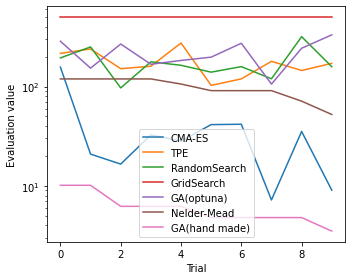

[I 2022-05-11 23:15:02,799] A new study created in memory with name: no-name-8219c66f-499d-4fc2-b767-484ca78f17b1
[I 2022-05-11 23:15:02,800] A new study created in memory with name: no-name-59a671f1-bf0d-4481-be6e-0aab6028a70b
[I 2022-05-11 23:15:02,801] A new study created in memory with name: no-name-5bfb44c1-64d3-4678-940b-68ab0f3b6dc6
[I 2022-05-11 23:15:02,802] A new study created in memory with name: no-name-c90772e5-3921-4fba-9b2d-104b7a4cc442
[I 2022-05-11 23:15:02,804] Trial 0 finished with value: 110.77854910481226 and parameters: {'x0': 1.993352152100992, 'x1': -0.5545272545940971, 'x2': 3.033182769134683, 'x3': 0.18496139003500645, 'x4': -3.038718828307779}. Best is trial 0 with value: 110.77854910481226.
[I 2022-05-11 23:15:02,806] Trial 1 finished with value: 139.41535200420213 and parameters: {'x0': 0.7048137347699603, 'x1': 0.42805338731777093, 'x2': 0.4001450974221851, 'x3': -1.2609686020130038, 'x4': -2.9766317081003275}. Best is trial 0 with value: 110.7785491048122

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:34.057575622446706, params:-0.538535272247635
trial:1, fval:34.057575622446706, params:-0.538535272247635
trial:2, fval:20.171968242899936, params:-2.9618553967186374
trial:3, fval:20.171968242899936, params:-2.9618553967186374
trial:4, fval:3.152400601626482, params:-2.765999227237344
trial:5, fval:3.152400601626482, params:-2.765999227237344
trial:6, fval:3.152400601626482, params:-2.765999227237344
trial:7, fval:3.1283599858658135, params:-2.7177468606784045
trial:8, fval:3.1283599858658135, params:-2.7177468606784045
CMA-ES achieved 91.84404944742906.
TPE achieved 84.76530206471213.
RandomSearch achieved 85.80516175004128.
GridSearch achieved 720.830825.
GA(optuna) achieved 107.4016479535452.
Nelder-Mead achieved 83.55877261129548.
GA(hand made) achieved 3.1283599858658135.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


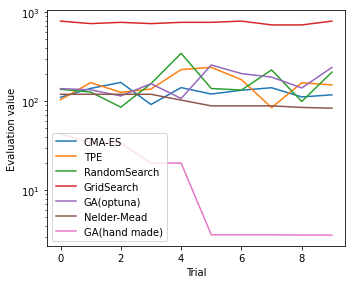

[I 2022-05-11 23:15:06,171] A new study created in memory with name: no-name-2ec7bb3e-8a65-447e-b302-b38d4f9edb1a
[I 2022-05-11 23:15:06,172] A new study created in memory with name: no-name-4a8d4ffe-8994-4fb2-9e86-f0868a9d9255
[I 2022-05-11 23:15:06,173] A new study created in memory with name: no-name-0bf8d94a-1236-4593-92be-64d63cb75930
[I 2022-05-11 23:15:06,175] A new study created in memory with name: no-name-9cc5adf0-5e31-48d8-a338-85b791c46cef
[I 2022-05-11 23:15:06,176] Trial 0 finished with value: 1.0114676951321946 and parameters: {'x0': 4.225760866347464, 'x1': 2.2518450915010835, 'x2': 2.4780136467273355, 'x3': -1.2796608517093686, 'x4': 3.815294235717431}. Best is trial 0 with value: 1.0114676951321946.
[I 2022-05-11 23:15:06,179] Trial 1 finished with value: 1.094314598127402 and parameters: {'x0': 1.9257211709162734, 'x1': 0.8786624645484036, 'x2': -0.012585722166149118, 'x3': -1.741661786239451, 'x4': 2.3408591987041625}. Best is trial 0 with value: 1.0114676951321946.

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:0.4705811266656823, params:0.37159483827502215
trial:1, fval:0.36179055087283596, params:0.1856271815906574
trial:2, fval:0.36179055087283596, params:0.1856271815906574
trial:3, fval:0.2820900116107793, params:1.735194611931958
trial:4, fval:0.2820900116107793, params:1.735194611931958
trial:5, fval:0.2820900116107793, params:1.735194611931958
trial:6, fval:0.23304009256751423, params:0.0885525397027754
trial:7, fval:0.23304009256751423, params:0.0885525397027754
trial:8, fval:0.21642056447268299, params:1.735194611931958
CMA-ES achieved 0.6554979936489603.
TPE achieved 0.9479013893257435.
RandomSearch achieved 0.8884892337110114.
GridSearch achieved 0.9059004610458478.
GA(optuna) achieved 0.8507009723711108.
Nelder-Mead achieved 0.6555790448727508.
GA(hand made) achieved 0.21642056447268299.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


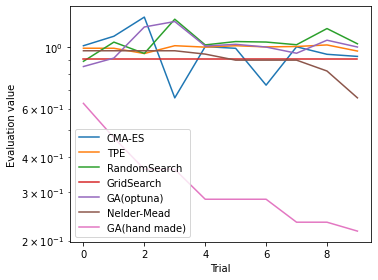

[I 2022-05-11 23:15:09,221] A new study created in memory with name: no-name-0326d56c-5157-48f6-b486-ead1668c0d54
[I 2022-05-11 23:15:09,222] A new study created in memory with name: no-name-d7295562-199b-46e8-8a98-afc4c438a04b
[I 2022-05-11 23:15:09,223] A new study created in memory with name: no-name-1ec2e02e-2a95-412c-a3d4-1c9c886b3f68
[I 2022-05-11 23:15:09,224] A new study created in memory with name: no-name-2bb0cc95-cf40-4b5e-9744-25befc052ec5
[I 2022-05-11 23:15:09,226] Trial 0 finished with value: 20.628673121019837 and parameters: {'x0': -0.8327379716471057, 'x1': -11.982174324784125, 'x2': 20.64494532708506, 'x3': 9.86939662704566, 'x4': 26.260174287504633}. Best is trial 0 with value: 20.628673121019837.
[I 2022-05-11 23:15:09,228] Trial 1 finished with value: 18.932628299492993 and parameters: {'x0': -19.467909872862418, 'x1': -4.929277284096577, 'x2': 8.87828976289904, 'x3': -7.700588237004547, 'x4': -0.949883010324088}. Best is trial 1 with value: 18.932628299492993.
[I

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:15.868568017917802, params:0.48674996291486183
trial:1, fval:11.180028509612109, params:-1.675746137442107
trial:2, fval:8.443052046078325, params:-0.8638655744739729
trial:3, fval:8.443052046078325, params:-0.8638655744739729
trial:4, fval:8.443052046078325, params:-0.8638655744739729
trial:5, fval:8.443052046078325, params:-0.8638655744739729
trial:6, fval:8.443052046078325, params:-0.8638655744739729
trial:7, fval:8.443052046078325, params:-0.8638655744739729
trial:8, fval:8.443052046078325, params:-0.8638655744739729
CMA-ES achieved 14.339294793619223.
TPE achieved 20.07701690574569.
RandomSearch achieved 20.447078188712336.
GridSearch achieved 19.950424956466673.
GA(optuna) achieved 20.177226027296285.
Nelder-Mead achieved 19.310444268936276.
GA(hand made) achieved 8.443052046078325.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


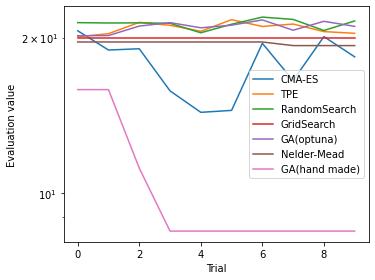

[I 2022-05-11 23:15:12,204] A new study created in memory with name: no-name-778efc83-11f8-4584-b089-d1f26f0c85b9
[I 2022-05-11 23:15:12,205] A new study created in memory with name: no-name-f318e3e2-95e7-48c2-b976-cc0627a41bfd
[I 2022-05-11 23:15:12,206] A new study created in memory with name: no-name-a667267f-b936-4b5f-a6fb-f3bef612f1ac
[I 2022-05-11 23:15:12,207] A new study created in memory with name: no-name-98a5a6cd-59df-4354-83a6-c98b3dc87db6
[I 2022-05-11 23:15:12,209] Trial 0 finished with value: 11141.97794089706 and parameters: {'x0': 0.358798207670862, 'x1': 2.588203422352181, 'x2': -1.453471352959117, 'x3': -1.573558293335371, 'x4': -2.540681294300866}. Best is trial 0 with value: 11141.97794089706.
[I 2022-05-11 23:15:12,211] Trial 1 finished with value: 308.5314978477385 and parameters: {'x0': -0.6483263295707623, 'x1': -0.30019000235814536, 'x2': 0.2284439320532454, 'x3': -0.6336368225676388, 'x4': 1.815697093540604}. Best is trial 1 with value: 308.5314978477385.
[I 

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:705.1554929420882, params:0.4516371290639311
trial:1, fval:366.3641582685532, params:0.3180613309345343
trial:2, fval:366.3641582685532, params:0.3180613309345343
trial:3, fval:132.8949831719101, params:0.3000153105321578
trial:4, fval:116.7006830594946, params:0.5647272981356064
trial:5, fval:113.44012163277382, params:0.31256280940849257
trial:6, fval:54.116156166774736, params:0.3580937557790893
trial:7, fval:54.116156166774736, params:0.3580937557790893
trial:8, fval:54.116156166774736, params:0.3580937557790893
CMA-ES achieved 288.97809218873675.
TPE achieved 2683.5339483742305.
RandomSearch achieved 3695.8100962952444.
GridSearch achieved 210064.0.
GA(optuna) achieved 1559.2506342895356.
Nelder-Mead achieved 19926.554567628562.
GA(hand made) achieved 54.116156166774736.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


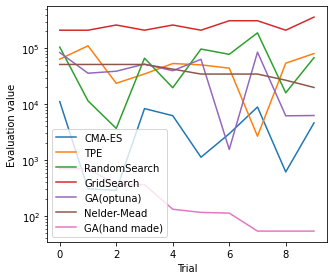

[I 2022-05-11 23:15:15,374] A new study created in memory with name: no-name-f5168edd-5159-4fc6-b1d0-78bf8a23b1ab
[I 2022-05-11 23:15:15,375] A new study created in memory with name: no-name-054656db-855b-47b8-97d3-1892015097ae
[I 2022-05-11 23:15:15,376] A new study created in memory with name: no-name-ff7c0353-0875-452e-b055-056dc9104892
[I 2022-05-11 23:15:15,378] A new study created in memory with name: no-name-35f01b5f-da83-4ef0-8bd1-442b6471f088
[I 2022-05-11 23:15:15,380] Trial 0 finished with value: 2907.1178511466733 and parameters: {'x0': -12.816826127187596, 'x1': -359.02538002282904, 'x2': 317.6558059242856, 'x3': -419.9764023825531, 'x4': 108.75449075885888}. Best is trial 0 with value: 2907.1178511466733.
[I 2022-05-11 23:15:15,382] Trial 1 finished with value: 2056.4699364495514 and parameters: {'x0': -70.45566617188565, 'x1': 65.57551488951725, 'x2': 39.083852789148644, 'x3': -114.95399636085183, 'x4': 104.35836713756566}. Best is trial 1 with value: 2056.4699364495514.

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:678.0913330259477, params:199.7537026243986
trial:1, fval:460.00094022945405, params:237.89963608514162
trial:2, fval:460.00094022945405, params:237.89963608514162
trial:3, fval:250.85005655476107, params:281.427770128168
trial:4, fval:135.0698297754634, params:425.2562701278859
trial:5, fval:135.0698297754634, params:425.2562701278859
trial:6, fval:135.0698297754634, params:425.2562701278859
trial:7, fval:67.21825748336641, params:420.5315990773547
trial:8, fval:67.21825748336641, params:420.5315990773547
CMA-ES achieved 1715.3560428676958.
TPE achieved 1440.0505987456538.
RandomSearch achieved 1557.1420741186091.
GridSearch achieved 1553.1470244058246.
GA(optuna) achieved 1538.9341040642805.
Nelder-Mead achieved 1117.3395190161214.
GA(hand made) achieved 67.21825748336641.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


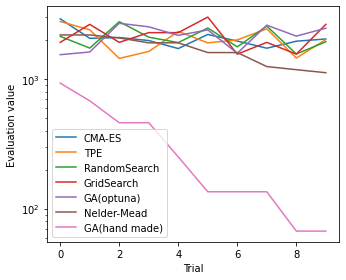

[I 2022-05-11 23:15:18,365] A new study created in memory with name: no-name-8aaa5bcb-821f-42fc-bcfb-7a9ce9eafc41
[I 2022-05-11 23:15:18,366] A new study created in memory with name: no-name-1ff30677-d4d9-473c-b54d-e57b7724c2fa
[I 2022-05-11 23:15:18,367] A new study created in memory with name: no-name-536f6ca7-f078-4929-8b9b-3ff922188e01
[I 2022-05-11 23:15:18,369] A new study created in memory with name: no-name-efc3caa0-5b5b-4855-ad85-871cd5f2bdac
[I 2022-05-11 23:15:18,371] Trial 0 finished with value: 11.007201086829221 and parameters: {'x0': -1.3965471428820315, 'x1': -2.2737007500887185, 'x2': -1.9522441567536735, 'x3': -5.308464087036532, 'x4': -5.705600915158188}. Best is trial 0 with value: 11.007201086829221.
[I 2022-05-11 23:15:18,373] Trial 1 finished with value: 0.440421701714967 and parameters: {'x0': 0.47526153224001294, 'x1': 1.425874335556215, 'x2': -0.012192091295179999, 'x3': 0.7222925547237783, 'x4': -0.6293276123260533}. Best is trial 1 with value: 0.440421701714

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:0.23464946730452868, params:0.7830989300437595
trial:1, fval:0.18979089336290045, params:-0.2494038190737305
trial:2, fval:0.18979089336290045, params:-0.2494038190737305
trial:3, fval:0.13060641615701138, params:-1.3613742090542575
trial:4, fval:0.12609514772527686, params:-0.12682814350045585
trial:5, fval:0.09949120249000316, params:-1.8002189476694077
trial:6, fval:0.09949120249000316, params:-1.8002189476694077
trial:7, fval:0.09949120249000316, params:-1.8002189476694077
trial:8, fval:0.09949120249000316, params:-1.8002189476694077
CMA-ES achieved 0.17406548692680232.
TPE achieved 2.173478373536963.
RandomSearch achieved 0.20068574895205202.
GridSearch achieved 4273.086372020563.
GA(optuna) achieved 1.0820498396515597.
Nelder-Mead achieved 2.9282764443162157.
GA(hand made) achieved 0.09949120249000316.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


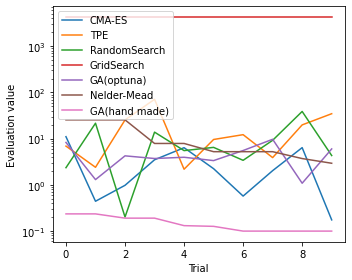

[I 2022-05-11 23:15:21,719] A new study created in memory with name: no-name-aa65be27-fa6b-49e5-b044-eb015a1f47fb
[I 2022-05-11 23:15:21,721] A new study created in memory with name: no-name-d06a65e6-744f-4897-993f-6d7f1cdf7c9b
[I 2022-05-11 23:15:21,721] A new study created in memory with name: no-name-c95df851-3a70-4c6d-a96e-c0c82ea17124
[I 2022-05-11 23:15:21,722] A new study created in memory with name: no-name-09aa805d-1951-4618-b654-0d047950f77b
[I 2022-05-11 23:15:21,724] Trial 0 finished with value: 238.04657715515563 and parameters: {'x0': -5.243604238506016, 'x1': -5.838641394871189, 'x2': 0.22925005834562384, 'x3': -8.901922001340932, 'x4': 9.787653818295368, 'x5': 1.1689825632458817}. Best is trial 0 with value: 238.04657715515563.
[I 2022-05-11 23:15:21,727] Trial 1 finished with value: 44.73168866120763 and parameters: {'x0': 2.43882958597403, 'x1': -2.86422943090912, 'x2': 3.529569481362153, 'x3': -0.15950793106350666, 'x4': 0.7490372041647047, 'x5': 4.187556380735817}. 

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:35.08724569002698, params:-1.226741603958103
trial:1, fval:13.180420122118674, params:-0.8269419075937607
trial:2, fval:13.180420122118674, params:-0.8269419075937607
trial:3, fval:13.180420122118674, params:-0.8269419075937607
trial:4, fval:4.130793999255932, params:0.5842771342271741
trial:5, fval:3.0671848549738745, params:0.5985185469116567
trial:6, fval:3.0671848549738745, params:0.5985185469116567
trial:7, fval:1.9003203376481994, params:-0.37023833144151874
trial:8, fval:1.9003203376481994, params:-0.37023833144151874
CMA-ES achieved 20.973233509159158.
TPE achieved 48.45874768929243.
RandomSearch achieved 53.17145220371324.
GridSearch achieved 600.0.
GA(optuna) achieved 103.2388522647878.
Nelder-Mead achieved 191.4116540189323.
GA(hand made) achieved 1.9003203376481994.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


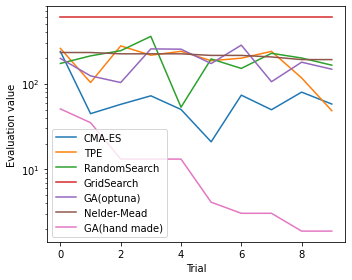

[I 2022-05-11 23:15:24,729] A new study created in memory with name: no-name-ef146de7-ee4d-4e66-ab9f-5c143e54f0a3
[I 2022-05-11 23:15:24,731] A new study created in memory with name: no-name-77d8045f-46aa-4a9a-a4c6-34ba92a6a4f3
[I 2022-05-11 23:15:24,732] A new study created in memory with name: no-name-cb3155bb-dd53-43da-b52b-81a0f459463c
[I 2022-05-11 23:15:24,733] A new study created in memory with name: no-name-655207b8-f868-4bc6-8a50-e507f3c6cf22
[I 2022-05-11 23:15:24,735] Trial 0 finished with value: 117.55377172536458 and parameters: {'x0': 3.194744636114434, 'x1': -0.6432626415500273, 'x2': 0.7996422478289764, 'x3': -3.1055911282636774, 'x4': 2.7627324268268207, 'x5': 2.5880475138715067}. Best is trial 0 with value: 117.55377172536458.
[I 2022-05-11 23:15:24,737] Trial 1 finished with value: 136.7544070264365 and parameters: {'x0': 1.5400103268294385, 'x1': -2.5538229913164536, 'x2': 1.2729189742445934, 'x3': -1.3349747096891977, 'x4': -0.22869879283905295, 'x5': -1.6991230192

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:57.562566249932246, params:-1.5349992719791155
trial:1, fval:43.798074010189396, params:-1.0846516226514478
trial:2, fval:32.74123394486503, params:-2.882522555069279
trial:3, fval:31.55213129121637, params:-2.7776023290500427
trial:4, fval:18.580360938598716, params:-2.564123407230703
trial:5, fval:18.580360938598716, params:-2.564123407230703
trial:6, fval:14.708247664176099, params:-2.6085183812710127
trial:7, fval:14.708247664176099, params:-2.6085183812710127
trial:8, fval:10.054624901430373, params:-2.7858995571843868
CMA-ES achieved 117.55377172536458.
TPE achieved 97.55169268561536.
RandomSearch achieved 100.184885259011.
GridSearch achieved 884.99699.
GA(optuna) achieved 95.05071195353705.
Nelder-Mead achieved 68.43874193865221.
GA(hand made) achieved 10.054624901430373.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


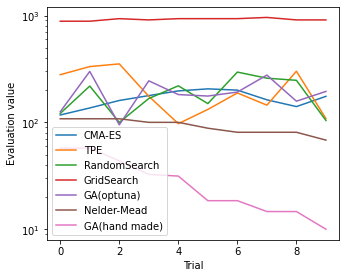

[I 2022-05-11 23:15:27,820] A new study created in memory with name: no-name-a33076e2-ad04-427f-b2d7-c6ee2dc9f6e7
[I 2022-05-11 23:15:27,821] A new study created in memory with name: no-name-45c88ded-f9f4-4a81-b99a-2bece28ff137
[I 2022-05-11 23:15:27,822] A new study created in memory with name: no-name-6ead6be6-8224-47a1-b4b4-ff708e2db5c5
[I 2022-05-11 23:15:27,823] A new study created in memory with name: no-name-3bec3c30-8d65-4c0d-9c44-e210b5f98979
[I 2022-05-11 23:15:27,825] Trial 0 finished with value: 0.9890765366767769 and parameters: {'x0': -4.7846044674520085, 'x1': 3.695029367796309, 'x2': -3.599724215521091, 'x3': -0.026556444809888724, 'x4': 0.6537536508794686, 'x5': -1.4668905452395165}. Best is trial 0 with value: 0.9890765366767769.
[I 2022-05-11 23:15:27,828] Trial 1 finished with value: 0.8312852987820982 and parameters: {'x0': 0.8306544453808878, 'x1': 0.8074306554204979, 'x2': 1.8497314446452249, 'x3': 0.07563385995776514, 'x4': -1.9966858837076484, 'x5': -0.17915284

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:0.27077800473092495, params:1.2547183369913364
trial:1, fval:0.27077800473092495, params:1.2547183369913364
trial:2, fval:0.27077800473092495, params:1.2547183369913364
trial:3, fval:0.1669504378720964, params:-0.35891105636611503
trial:4, fval:0.1669504378720964, params:-0.35891105636611503
trial:5, fval:0.1558336486181261, params:-0.3022495163253545
trial:6, fval:0.1558336486181261, params:-0.3022495163253545
trial:7, fval:0.1558336486181261, params:-0.3022495163253545
trial:8, fval:0.1558336486181261, params:-0.3022495163253545
CMA-ES achieved 0.5056627714009803.
TPE achieved 0.9850647685232917.
RandomSearch achieved 0.9636532101558486.
GridSearch achieved 1.0943188276384515.
GA(optuna) achieved 0.8304917329390591.
Nelder-Mead achieved 0.9585673171742494.
GA(hand made) achieved 0.1558336486181261.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


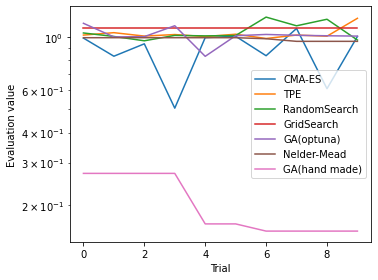

[I 2022-05-11 23:15:30,925] A new study created in memory with name: no-name-1451b921-1c85-476c-be4f-872a5663bbc7
[I 2022-05-11 23:15:30,926] A new study created in memory with name: no-name-445f6bfe-2db1-4341-aa0a-3ba0dfd1b94b
[I 2022-05-11 23:15:30,927] A new study created in memory with name: no-name-8445ddc8-ecb6-487d-a72e-627404e49cc6
[I 2022-05-11 23:15:30,928] A new study created in memory with name: no-name-127f3352-72ee-4f5c-9657-0c70f5569153
[I 2022-05-11 23:15:30,930] Trial 0 finished with value: 21.0925253867287 and parameters: {'x0': 23.08411007778257, 'x1': -14.204417272200766, 'x2': -25.28538974229964, 'x3': 4.144453737414068, 'x4': -23.428654570717047, 'x5': 20.875286333471962}. Best is trial 0 with value: 21.0925253867287.
[I 2022-05-11 23:15:30,932] Trial 1 finished with value: 19.075406846754532 and parameters: {'x0': -4.531919420510241, 'x1': -11.8816940446011, 'x2': -8.957868216435035, 'x3': 4.748737244900364, 'x4': 2.219028533666097, 'x5': -18.483683120588726}. Be

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:17.792725105734675, params:-1.4744294379169804
trial:1, fval:15.577849419498522, params:-2.8629038870952592
trial:2, fval:15.577849419498522, params:-2.8629038870952592
trial:3, fval:11.566028668996907, params:-0.11059118514391741
trial:4, fval:8.16036009866657, params:-4.571112879770175
trial:5, fval:8.16036009866657, params:-4.571112879770175
trial:6, fval:8.16036009866657, params:-4.571112879770175
trial:7, fval:8.16036009866657, params:-4.571112879770175
trial:8, fval:8.16036009866657, params:-4.571112879770175
CMA-ES achieved 16.46523343456179.
TPE achieved 20.414646865180078.
RandomSearch achieved 19.203564532397742.
GridSearch achieved 19.950424956466673.
GA(optuna) achieved 20.107282640192533.
Nelder-Mead achieved 19.962675036636934.
GA(hand made) achieved 8.16036009866657.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


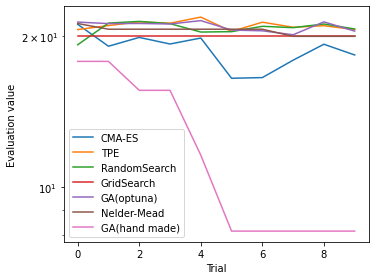

[I 2022-05-11 23:15:33,915] A new study created in memory with name: no-name-045878fc-57d1-4b7e-8b52-acbc60c4e3c5
[I 2022-05-11 23:15:33,916] A new study created in memory with name: no-name-11a61da7-a1ae-4ac4-b062-0c858acf9000
[I 2022-05-11 23:15:33,917] A new study created in memory with name: no-name-4c553db1-cef8-451b-bee2-89accb76c714
[I 2022-05-11 23:15:33,918] A new study created in memory with name: no-name-add929b9-42c2-4d91-93ad-dcf667bb6723
[I 2022-05-11 23:15:33,920] Trial 0 finished with value: 121989.3324853761 and parameters: {'x0': -4.624325345485469, 'x1': -1.9956166655404175, 'x2': -3.544939884019053, 'x3': 0.38120719397889147, 'x4': 4.0811260792725506, 'x5': -4.602842891447136}. Best is trial 0 with value: 121989.3324853761.
[I 2022-05-11 23:15:33,923] Trial 1 finished with value: 21318.539927153022 and parameters: {'x0': 0.8005967220647078, 'x1': 3.8990669130120503, 'x2': 1.1575876910863092, 'x3': -0.2696040281109196, 'x4': -1.0080204906719643, 'x5': -0.168956848532

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:3658.480732521046, params:0.7241941789513516
trial:1, fval:849.2111971857252, params:1.4005332833865614
trial:2, fval:849.2111971857252, params:1.4005332833865614
trial:3, fval:849.2111971857252, params:1.4005332833865614
trial:4, fval:438.7110920034356, params:1.4692168820916989
trial:5, fval:438.7110920034356, params:1.4692168820916989
trial:6, fval:335.6205492979896, params:1.516350252846537
trial:7, fval:335.6205492979896, params:1.516350252846537
trial:8, fval:335.6205492979896, params:1.516350252846537
CMA-ES achieved 1546.6931147460414.
TPE achieved 44808.542051595155.
RandomSearch achieved 27157.434963232514.
GridSearch achieved 250100.0.
GA(optuna) achieved 6518.9895270526495.
Nelder-Mead achieved 35799.65181463059.
GA(hand made) achieved 335.6205492979896.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


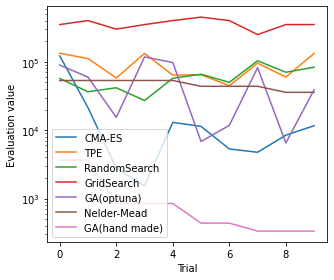

[I 2022-05-11 23:15:36,948] A new study created in memory with name: no-name-a360c11c-f174-4401-814c-04a5519f0c34
[I 2022-05-11 23:15:36,950] A new study created in memory with name: no-name-b4b7e7db-83bb-4f44-962b-7e977f7d5053
[I 2022-05-11 23:15:36,951] A new study created in memory with name: no-name-ce59a1a3-b818-4b49-b851-957830abf211
[I 2022-05-11 23:15:36,952] A new study created in memory with name: no-name-a2376bbb-0758-4ce9-8b6d-8dea99d147c0
[I 2022-05-11 23:15:36,954] Trial 0 finished with value: 3016.1117644841793 and parameters: {'x0': -98.0910696551469, 'x1': 280.90840811930605, 'x2': 136.3446360026228, 'x3': -215.28221539067573, 'x4': 223.7076504987731, 'x5': 268.0199257966502}. Best is trial 0 with value: 3016.1117644841793.
[I 2022-05-11 23:15:36,956] Trial 1 finished with value: 2323.086443716288 and parameters: {'x0': -240.41946782584012, 'x1': 19.172552728909512, 'x2': 2.5675542622081045, 'x3': -124.74922164647064, 'x4': -47.52248908087839, 'x5': 184.99878967550785}

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:1316.9798516059823, params:181.67464939724346
trial:1, fval:977.8232768906414, params:204.40325452446237
trial:2, fval:977.8232768906414, params:204.40325452446237
trial:3, fval:705.8418131770113, params:176.79698938318188
trial:4, fval:705.8418131770113, params:176.79698938318188
trial:5, fval:493.1109587291753, params:435.5350694668312
trial:6, fval:493.1109587291753, params:435.5350694668312
trial:7, fval:493.1109587291753, params:435.5350694668312
trial:8, fval:493.1109587291753, params:435.5350694668312
CMA-ES achieved 1943.9319822589923.
TPE achieved 1552.4792001048788.
RandomSearch achieved 1603.0035764231593.
GridSearch achieved 1791.540765874433.
GA(optuna) achieved 2056.601585538498.
Nelder-Mead achieved 1324.9426860619214.
GA(hand made) achieved 493.1109587291753.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


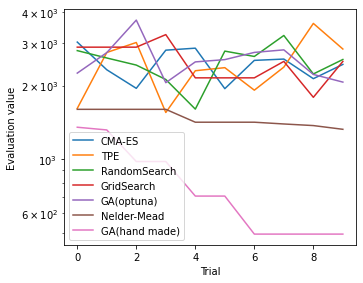

[I 2022-05-11 23:15:40,140] A new study created in memory with name: no-name-4ee8e10b-65ca-407c-9c90-00676a8ecd76
[I 2022-05-11 23:15:40,141] A new study created in memory with name: no-name-24af3c44-7cbc-43db-b4e5-aa1d14bcaf03
[I 2022-05-11 23:15:40,142] A new study created in memory with name: no-name-b9ed5b7b-f3c8-413e-a52f-c01598b8b1fc
[I 2022-05-11 23:15:40,143] A new study created in memory with name: no-name-c9bd2a25-5ad9-4ee3-96bd-2dc60e58b43b
[I 2022-05-11 23:15:40,145] Trial 0 finished with value: 3.577821398999701 and parameters: {'x0': -5.701949957731582, 'x1': -4.0922356651893494, 'x2': -1.5065985058819678, 'x3': -5.738787321501711, 'x4': 1.39795991535755, 'x5': 2.114588283682746}. Best is trial 0 with value: 3.577821398999701.
[I 2022-05-11 23:15:40,148] Trial 1 finished with value: 13.68233742252778 and parameters: {'x0': 1.6617056247940045, 'x1': 2.493647374106056, 'x2': 1.9440226710514312, 'x3': -3.2432587199666103, 'x4': -1.3890176652024406, 'x5': -0.06164126834435441

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:0.10485240559812503, params:-2.5906264283426643
trial:1, fval:0.10398433639478653, params:-0.5717785992203733
trial:2, fval:0.08855454464114847, params:-2.2169894061076847
trial:3, fval:0.058020981624999, params:-0.993997874909748
trial:4, fval:0.037424617737125306, params:-0.0820151441210218
trial:5, fval:0.037424617737125306, params:-0.0820151441210218
trial:6, fval:0.037424617737125306, params:-0.0820151441210218
trial:7, fval:0.037424617737125306, params:-0.0820151441210218
trial:8, fval:0.037424617737125306, params:-0.0820151441210218
CMA-ES achieved 0.24526396158046668.
TPE achieved 3.3371892794864473.
RandomSearch achieved 0.5376212895671225.
GridSearch achieved 13824.422579471735.
GA(optuna) achieved 0.08946249967163426.
Nelder-Mead achieved 0.12827264013370734.
GA(hand made) achieved 0.037424617737125306.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


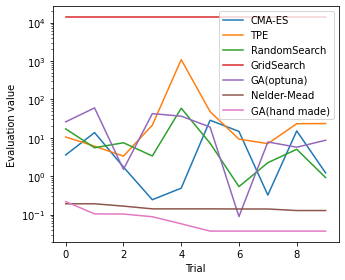

[I 2022-05-11 23:15:43,499] A new study created in memory with name: no-name-fedf694d-20db-4c11-996c-2d6588e4808c
[I 2022-05-11 23:15:43,500] A new study created in memory with name: no-name-90e11425-732d-4d27-8f88-f695ad310718
[I 2022-05-11 23:15:43,501] A new study created in memory with name: no-name-5b3194ce-66ea-4789-ab9f-fe022f7eb634
[I 2022-05-11 23:15:43,502] A new study created in memory with name: no-name-d25e4cdf-d9ad-48c9-b094-f127471e38de
[I 2022-05-11 23:15:43,504] Trial 0 finished with value: 197.67869246084402 and parameters: {'x0': 8.976122066477224, 'x1': 0.5759776808109329, 'x2': 6.07843741411347, 'x3': -6.011401833121224, 'x4': 1.9174772075159687, 'x5': 3.367759581166819, 'x6': 5.354745370726842}. Best is trial 0 with value: 197.67869246084402.
[I 2022-05-11 23:15:43,507] Trial 1 finished with value: 62.62423203956111 and parameters: {'x0': -2.865659467458874, 'x1': -5.829097060892256, 'x2': -0.33544758768324295, 'x3': -1.3120253920519462, 'x4': -1.6612893411606553,

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:72.5825861774455, params:1.1789518003479977
trial:1, fval:42.28154062304106, params:0.7220800827494819
trial:2, fval:42.28154062304106, params:0.7220800827494819
trial:3, fval:38.26640436434173, params:-3.6810028811474966
trial:4, fval:37.578248851230995, params:-1.7658593817856858
trial:5, fval:33.025109195810764, params:-0.09334734990649071
trial:6, fval:24.632010807023434, params:-1.2363942687840337
trial:7, fval:23.317196785225224, params:0.5359351228262336
trial:8, fval:23.317196785225224, params:0.5359351228262336
CMA-ES achieved 15.712824196120497.
TPE achieved 115.29863186654174.
RandomSearch achieved 111.22546625191556.
GridSearch achieved 700.0.
GA(optuna) achieved 90.60795795409652.
Nelder-Mead achieved 174.42617591367457.
GA(hand made) achieved 23.317196785225224.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


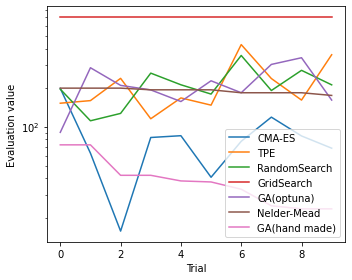

[I 2022-05-11 23:15:46,563] A new study created in memory with name: no-name-49d5ee30-5234-4782-896e-287dde1d43d4
[I 2022-05-11 23:15:46,564] A new study created in memory with name: no-name-d694faba-d8e1-48c9-87fe-dc9c6b940bff
[I 2022-05-11 23:15:46,565] A new study created in memory with name: no-name-b210c04a-3f26-4324-a7a6-48b7a33373ae
[I 2022-05-11 23:15:46,566] A new study created in memory with name: no-name-f020b823-4bcc-4ce5-abe4-9691ba1beb2e
[I 2022-05-11 23:15:46,568] Trial 0 finished with value: 238.1935113730459 and parameters: {'x0': 1.3586178210478463, 'x1': 1.8793515620258647, 'x2': 1.0698698618553069, 'x3': 4.062637382938899, 'x4': -0.12569279297027425, 'x5': 0.2273523118299936, 'x6': 3.3987755709497165}. Best is trial 0 with value: 238.1935113730459.
[I 2022-05-11 23:15:46,570] Trial 1 finished with value: 202.95888259542886 and parameters: {'x0': -1.640176879242789, 'x1': 1.1842584077118405, 'x2': 1.938300450547702, 'x3': 0.2813733497559338, 'x4': 1.6240248426709658,

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:84.83137633999982, params:-1.4327034775562277
trial:1, fval:84.83137633999982, params:-1.4327034775562277
trial:2, fval:57.021047076846344, params:-2.385474509388262
trial:3, fval:46.7743337492233, params:-1.9270724329234539
trial:4, fval:30.39699277107627, params:-2.2150602695861226
trial:5, fval:30.39699277107627, params:-2.2150602695861226
trial:6, fval:22.41181652843798, params:-2.9332783355924015
trial:7, fval:21.337613025232315, params:-2.9823744277121738
trial:8, fval:21.337613025232315, params:-2.9823744277121738
CMA-ES achieved 159.86843635932598.
TPE achieved 135.29985116540928.
RandomSearch achieved 153.25984689552635.
GridSearch achieved 1024.163155.
GA(optuna) achieved 171.50047793945302.
Nelder-Mead achieved 90.49326939208447.
GA(hand made) achieved 21.337613025232315.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


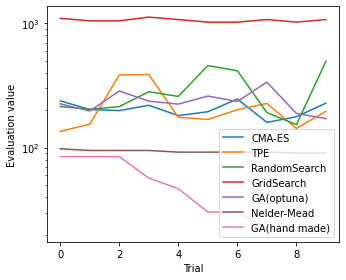

[I 2022-05-11 23:15:49,626] A new study created in memory with name: no-name-912a03cb-8159-4394-9782-284397e98a51
[I 2022-05-11 23:15:49,627] A new study created in memory with name: no-name-3ab81e66-e52e-4338-aedb-28af68e91ea8
[I 2022-05-11 23:15:49,628] A new study created in memory with name: no-name-846c4910-e85c-4d60-b6cd-541b12bebcec
[I 2022-05-11 23:15:49,629] A new study created in memory with name: no-name-bfbaaf90-3da7-4ca2-8cdb-3ea38566c64d
[I 2022-05-11 23:15:49,631] Trial 0 finished with value: 1.015586108615492 and parameters: {'x0': 1.7273862968356752, 'x1': -0.7315859564444693, 'x2': 1.1377636556608648, 'x3': -2.7593667655787657, 'x4': 4.675180107669727, 'x5': -0.045081702644761634, 'x6': 4.605302890690256}. Best is trial 0 with value: 1.015586108615492.
[I 2022-05-11 23:15:49,635] Trial 1 finished with value: 1.0077630178790076 and parameters: {'x0': -3.6091089075189586, 'x1': -2.2270315891824777, 'x2': -0.7503234533445842, 'x3': 2.426541471703529, 'x4': -2.52678664952

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:0.6420371497642927, params:0.23549844709657375
trial:1, fval:0.6420371497642927, params:0.23549844709657375
trial:2, fval:0.5985769104153291, params:0.27838735058450326
trial:3, fval:0.27474495640133834, params:0.23549844709657375
trial:4, fval:0.27474495640133834, params:0.23549844709657375
trial:5, fval:0.27474495640133834, params:0.23549844709657375
trial:6, fval:0.27474495640133834, params:0.23549844709657375
trial:7, fval:0.27474495640133834, params:0.23549844709657375
trial:8, fval:0.27474495640133834, params:0.23549844709657375
CMA-ES achieved 0.9114980650246205.
TPE achieved 0.8489019355154588.
RandomSearch achieved 0.741558751682954.
GridSearch achieved 1.025929235365563.
GA(optuna) achieved 0.986078920214327.
Nelder-Mead achieved 0.9526735731587243.
GA(hand made) achieved 0.27474495640133834.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


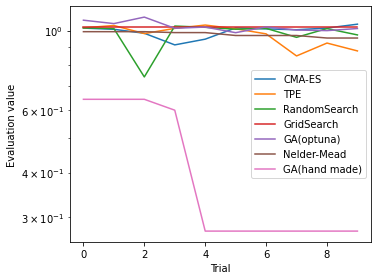

[I 2022-05-11 23:15:52,774] A new study created in memory with name: no-name-8f22bffa-b754-48f4-9b9c-3f0ca87e436b
[I 2022-05-11 23:15:52,775] A new study created in memory with name: no-name-102a0a24-64e5-4a35-b666-83390b2d1edb
[I 2022-05-11 23:15:52,776] A new study created in memory with name: no-name-55c2c831-b2e0-4a43-9a1f-27111cc27bf6
[I 2022-05-11 23:15:52,777] A new study created in memory with name: no-name-58481205-c42f-4ceb-8990-57a95f923da0
[I 2022-05-11 23:15:52,779] Trial 0 finished with value: 20.80466195373304 and parameters: {'x0': -24.802103313295326, 'x1': 11.460290177846176, 'x2': 8.883908969586777, 'x3': -7.129082354655122, 'x4': -14.833327488114445, 'x5': -24.68329872346275, 'x6': -0.636015809368164}. Best is trial 0 with value: 20.80466195373304.
[I 2022-05-11 23:15:52,782] Trial 1 finished with value: 18.825460180589655 and parameters: {'x0': -14.94612989445523, 'x1': 3.345359624846626, 'x2': 0.701524174958737, 'x3': 12.597187358067558, 'x4': -14.142315301223736,

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:17.479664530948327, params:-3.4921541814825834
trial:1, fval:15.063709660037453, params:-1.6904881829149778
trial:2, fval:13.501991424309107, params:-0.36092457244041903
trial:3, fval:13.396633870156105, params:2.1933730419230146
trial:4, fval:13.396633870156105, params:2.1933730419230146
trial:5, fval:13.020995941260281, params:-1.6917258308147214
trial:6, fval:12.404516049347679, params:0.9361964962662098
trial:7, fval:11.895895665173322, params:0.3736715356701704
trial:8, fval:11.895895665173322, params:0.3736715356701704
CMA-ES achieved 15.307511373746298.
TPE achieved 19.64841440218564.
RandomSearch achieved 19.16106017340918.
GridSearch achieved 19.950424956466673.
GA(optuna) achieved 16.09795569013429.
Nelder-Mead achieved 19.808342177436405.
GA(hand made) achieved 11.895895665173322.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


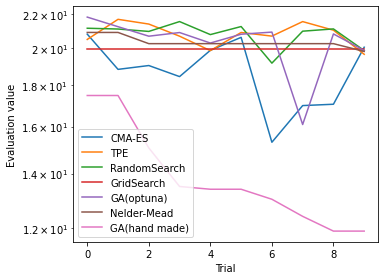

[I 2022-05-11 23:15:55,938] A new study created in memory with name: no-name-582dcffc-fed6-45b2-b470-9764c78bbbe7
[I 2022-05-11 23:15:55,939] A new study created in memory with name: no-name-53f79741-6398-42ee-9516-47a639e8e81b
[I 2022-05-11 23:15:55,940] A new study created in memory with name: no-name-c6e42685-0625-4633-94d5-76a36e67875e
[I 2022-05-11 23:15:55,941] A new study created in memory with name: no-name-e562ace0-4a50-4291-bbe5-e5e8eeb8c074
[I 2022-05-11 23:15:55,943] Trial 0 finished with value: 48133.85064583711 and parameters: {'x0': -0.9131888171543325, 'x1': -2.761491687519139, 'x2': 3.2636533339551903, 'x3': 3.6569270793912363, 'x4': 1.9555117996146016, 'x5': -3.899088451321817, 'x6': 0.7148762491829297}. Best is trial 0 with value: 48133.85064583711.
[I 2022-05-11 23:15:55,946] Trial 1 finished with value: 1584.9271852396062 and parameters: {'x0': 1.3419482314958253, 'x1': -0.5716232399578607, 'x2': 1.4163734926986735, 'x3': 0.2564662136738518, 'x4': 0.583512797840246

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:2309.4765006589287, params:0.012013297492827693
trial:1, fval:1341.7594911339454, params:-0.33360163474369947
trial:2, fval:629.5475132028868, params:-0.2551066063969712
trial:3, fval:629.5475132028868, params:-0.2551066063969712
trial:4, fval:587.3331353327959, params:-0.24461504922643076
trial:5, fval:538.7266546499128, params:-0.2277228485978693
trial:6, fval:538.7266546499128, params:-0.2277228485978693
trial:7, fval:538.7266546499128, params:-0.2277228485978693
trial:8, fval:538.7266546499128, params:-0.2277228485978693
CMA-ES achieved 948.7801423351756.
TPE achieved 42544.55165628973.
RandomSearch achieved 17538.000150527077.
GridSearch achieved 240116.0.
GA(optuna) achieved 34116.05358689922.
Nelder-Mead achieved 111688.22690262418.
GA(hand made) achieved 538.7266546499128.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


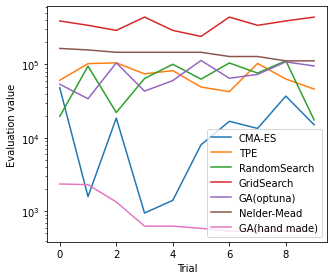

[I 2022-05-11 23:15:59,146] A new study created in memory with name: no-name-e22788f4-9c63-4b42-8923-b7b6ac382f09
[I 2022-05-11 23:15:59,147] A new study created in memory with name: no-name-b93ef0fa-1520-460f-a0dc-23f1c0b4e1fc
[I 2022-05-11 23:15:59,148] A new study created in memory with name: no-name-7f4dbdc0-205a-4a8f-ab18-fc6e94a9d009
[I 2022-05-11 23:15:59,150] A new study created in memory with name: no-name-1c1174e1-5a7d-4878-9755-624198b99be0
[I 2022-05-11 23:15:59,152] Trial 0 finished with value: 2563.943508038764 and parameters: {'x0': 73.85209963904003, 'x1': -3.3847151679728995, 'x2': -236.63248134952642, 'x3': -69.76413360823085, 'x4': 369.58575866987417, 'x5': 222.30461622587518, 'x6': -498.09518224725446}. Best is trial 0 with value: 2563.943508038764.
[I 2022-05-11 23:15:59,154] Trial 1 finished with value: 2562.0107435801715 and parameters: {'x0': -145.67442821145752, 'x1': -124.08448696979866, 'x2': -10.617354688626728, 'x3': 171.22360263959885, 'x4': -16.3129984761

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:1420.4115336184702, params:67.39238749517662
trial:1, fval:1119.69587773794, params:-19.243552662094828
trial:2, fval:1119.69587773794, params:-19.243552662094828
trial:3, fval:827.707237345755, params:221.86404284926817
trial:4, fval:810.6993350715425, params:60.901432347417206
trial:5, fval:810.6993350715425, params:60.901432347417206
trial:6, fval:613.6374907331492, params:211.5456196102456
trial:7, fval:480.4072756138062, params:318.8719800820212
trial:8, fval:480.4072756138062, params:318.8719800820212
CMA-ES achieved 2310.566239786456.
TPE achieved 2316.5689576562922.
RandomSearch achieved 2146.953473042253.
GridSearch achieved 2029.934507343041.
GA(optuna) achieved 1821.5384024372652.
Nelder-Mead achieved 1817.9129579811552.
GA(hand made) achieved 480.4072756138062.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


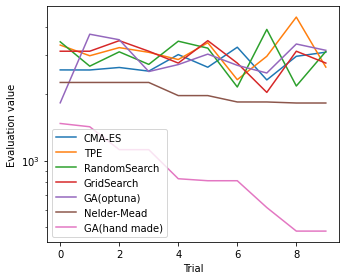

[I 2022-05-11 23:16:02,119] A new study created in memory with name: no-name-f46f01b2-fe51-408e-9927-45a7f2f85b59
[I 2022-05-11 23:16:02,120] A new study created in memory with name: no-name-bc7859a2-b1db-4ad5-95f1-f84f9bd43f6d
[I 2022-05-11 23:16:02,121] A new study created in memory with name: no-name-a2d5766a-50e4-4770-9691-34e88300494b
[I 2022-05-11 23:16:02,122] A new study created in memory with name: no-name-0becd532-556a-4c2e-bbd6-a5dcf1c9856c
[I 2022-05-11 23:16:02,124] Trial 0 finished with value: 1.0147589834493913 and parameters: {'x0': -5.096975956713669, 'x1': -2.900613386900611, 'x2': -2.882582616639186, 'x3': 4.181049594256043, 'x4': 1.3484582265604175, 'x5': 1.082348516213127, 'x6': -3.489995045349499}. Best is trial 0 with value: 1.0147589834493913.
[I 2022-05-11 23:16:02,127] Trial 1 finished with value: 1.1467003489410041 and parameters: {'x0': 1.1880044026918266, 'x1': -0.11096548777549663, 'x2': 0.9475082706170351, 'x3': -4.770535705807991, 'x4': -0.79233968048928

CMA-ES start!
TPE start!
RandomSearch start!
GridSearch start!
GA(optuna) start!
Nelder-Mead start!
GA(hand made) start!
trial:0, fval:0.09454531754754097, params:-0.8999327736181224
trial:1, fval:0.08228785915321085, params:-0.1662169403961065
trial:2, fval:0.023150943994681657, params:-0.3115449584015086
trial:3, fval:0.023150943994681657, params:-0.3115449584015086
trial:4, fval:0.019960225929709717, params:-0.08951643366018518
trial:5, fval:0.019879553614272794, params:-0.07975657259008491
trial:6, fval:0.019879553614272794, params:-0.07975657259008491
trial:7, fval:0.019879553614272794, params:-0.07975657259008491
trial:8, fval:0.019879553614272794, params:-0.07975657259008491
CMA-ES achieved 0.08653971348990785.
TPE achieved 0.16268551930860484.
RandomSearch achieved 0.8589692357798745.
GridSearch achieved 43482.83721256806.
GA(optuna) achieved 0.8077196816691663.
Nelder-Mead achieved 0.06416530511796477.
GA(hand made) achieved 0.019879553614272794.


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


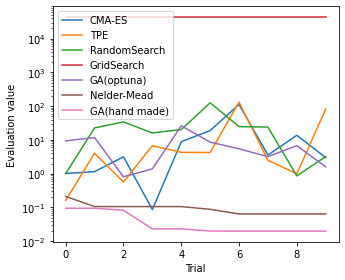

In [15]:
df = pd.DataFrame()
dim_s = [5,6,7]
max_iter =10

for dim in dim_s:
    model_s = {
                'QF':QuadraticFunction(dim=dim),
                'STF':StyblinskiTangFunction(dim=dim),
                'GF':GriewankFunction(dim=dim),
                'AF':AckleyFunction(dim=dim),
                'RF':RosenbrockFunction(dim=dim),
                'SF':SchwefelFunction(dim=dim),
                'XSYF':XinSheYangFunction(dim=dim),
            }

    for name,model in model_s.items():
        dict_additional = {
            'dimention':[],
            'model name':[]
        }

        bm = BenchMarker(max_iter=max_iter)
        df_temp = bm.benchmark(model = model)
        bm.plot_history(fig_name=str(dim)+'_'+name,is_log=True,is_save=True)

        
        dict_additional['dimention']=[dim for i in range(len(model_s))]
        dict_additional['model name']=[name for i in range(len(model_s))]
        df_additional = pd.DataFrame(dict_additional)

        df_temp = pd.concat([df_temp, df_additional], axis=1)
                
        df = pd.concat([df,df_temp])

In [16]:
df

,algo,calc time,fval,dimention,model name
0,CMA-ES,0.021856,7.212038,5,QF
1,TPE,0.017075,102.678957,5,QF
2,RandomSearch,0.014726,96.860400,5,QF
3,GridSearch,0.015690,500.000000,5,QF
4,GA(optuna),0.016904,105.810983,5,QF
...,...,...,...,...,...
2,RandomSearch,0.019485,0.858969,7,XSYF
3,GridSearch,0.014330,43482.837213,7,XSYF
4,GA(optuna),0.017947,0.807720,7,XSYF
5,Nelder-Mead,0.001673,0.064165,7,XSYF
